# Protein Synthesis Simulation

Load dataset:

In [1]:
from HumanGenomeDataset.load_dataset import load_dataset

data_df = load_dataset('dna_protein_coding_sequences')
data_df.head(2)

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,ID,sequence,category
0,NM_001368254.1,GCTGAGCTGAGCTGGGGCGCAGCCGCCTGTCTGCACCGGCAGCACC...,NM
1,NM_001350977.1,TCCACAACTGAAACATCCACTTCTGAACACCATGTCCTACTACAGC...,NM


### Simulation

In [2]:
from src.simulation import ProteinSinthesisProcess

In [3]:
import random
random.seed(42)

In [4]:
SIM_TIME = 3600*2 # 2 hours
NUMBER_RESOURCES = 20
NUMBER_RNA_POLYMERASES = 15
NUMBER_RIBOSOMES = 8
URACIL_INITIAL_AMOUNT = random.randint(1e+4, 5e+4)
ADENINE_INITIAL_AMOUNT = random.randint(1e+4, 5e+4)
GUANINE_INITIAL_AMOUNT = random.randint(1e+4, 5e+4)
CYTOSINE_INITIAL_AMOUNT = random.randint(1e+4, 5e+4)
RANDOM_SEED = 42

In [5]:
protein_synthesis_process = ProteinSinthesisProcess(
    dna_sequences_df=data_df,
    number_resources=NUMBER_RESOURCES,
    number_rna_polymerases=NUMBER_RNA_POLYMERASES, 
    number_ribosomes=NUMBER_RIBOSOMES,
    uracil_initial_amount=URACIL_INITIAL_AMOUNT,
    adenine_initial_amount=ADENINE_INITIAL_AMOUNT,
    guanine_initial_amount=GUANINE_INITIAL_AMOUNT,
    cytosine_initial_amount=CYTOSINE_INITIAL_AMOUNT,
    random_seed=RANDOM_SEED,
    verbose=False
    )

Simulation environment initialized, time unit: 0.0001 second.


In [6]:
print(protein_synthesis_process)

Protein Sinthesis Process:
185310 dna sequences to synthesize,
20 resources available,
15 RNA polymerases,
8 ribosomes,
17296 uracil bases,
11639 adenine bases,
28024 guanine bases,
26049 cytosine bases.


Start simulation:

In [7]:
protein_synthesis_process.run(simulation_time=SIM_TIME) # run the simulation

Simulation started
End simulation: 39 proteins synthesized from 19 DNA sequences.


In [8]:
protein_synthesis_process.save_process() # save the process

Process saved.


### Results

In [9]:
import pandas as pd
results_path = 'results/results.csv'

results_df = pd.read_csv(results_path, index_col=0)

In [10]:
print('Number of DNA sequence traslated:', results_df[results_df['mrna_sequences'].notna()].shape[0])
print('Number of DNA sequence not traslated:', results_df[results_df['protein_synthesized']==False].shape[0])

Number of DNA sequence traslated: 18
Number of DNA sequence not traslated: 1


In [11]:
results_df[results_df['mrna_sequences'].notna()][[
    'polypeptides_chains', 'number_of_proteins_synthesized', 'length_proteins', 'number_different_proteins']]

,polypeptides_chains,number_of_proteins_synthesized,length_proteins,number_different_proteins
1372,['NH2-RGLGRGPSQRVADVVVPRLPSSTEVCPVCTCLNPDVP-CO...,3,"[37, 37, 37]",1.0
5653,"['NH2-WCVFELFELWLKLRCAVMDL-COOH', 'NH2-WCVFELF...",2,"[20, 20]",1.0
17123,"['NH2-REEGGILKRKVTGEMTKPRSDSNSYMSD-COOH', 'NH2...",2,"[28, 28]",1.0
43843,['NH2-SYDALGRLGHRRLGFVSPRKAMNVPYDLRPRPPRGSSSVP...,1,[44],1.0
45544,['NH2-AKSPPPAPPPPSPPPAPPSTSSLGAVPRCPDLTAFYGRTT...,2,"[41, 41]",1.0
64893,['NH2-KLYTTFTTTYPK-COOH'],1,[12],1.0
69193,['NH2-SRSQILKFTLISHHKCSFTLTYSVEIGEGRKKSILSGII-...,3,"[39, 39, 39]",1.0
83896,['NH2-NFSANASFFYRNYYS-COOH'],1,[15],1.0
109799,['NH2-EGRDGCPEVGLEAGPEGRSGDVGGERRPRRPVAAPPSARR...,2,"[66, 66]",1.0
112897,"['NH2-PGGPLSPPPRSPTSRGRVDPAGAGLSGSL-COOH', 'NH...",4,"[29, 29, 29, 29]",1.0


### Protein Length

In [12]:
from src.utils.plot_utils import *

In [13]:
results_df = pd.read_csv('results/results.csv', index_col=0)

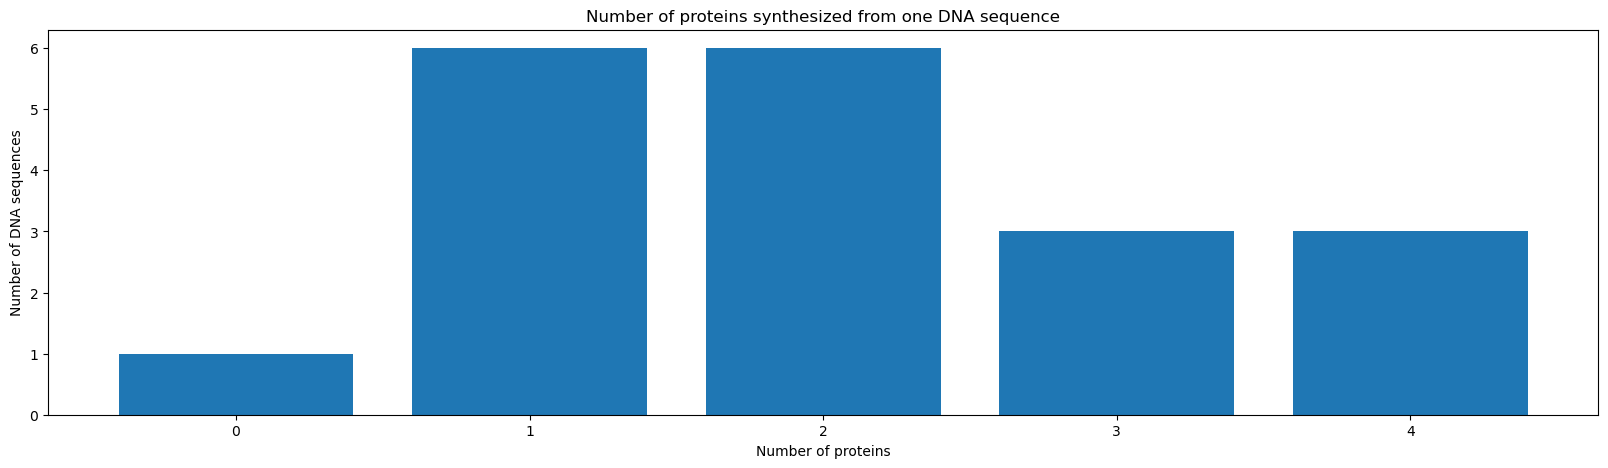

In [14]:
barplot_proteins_number(results_df)

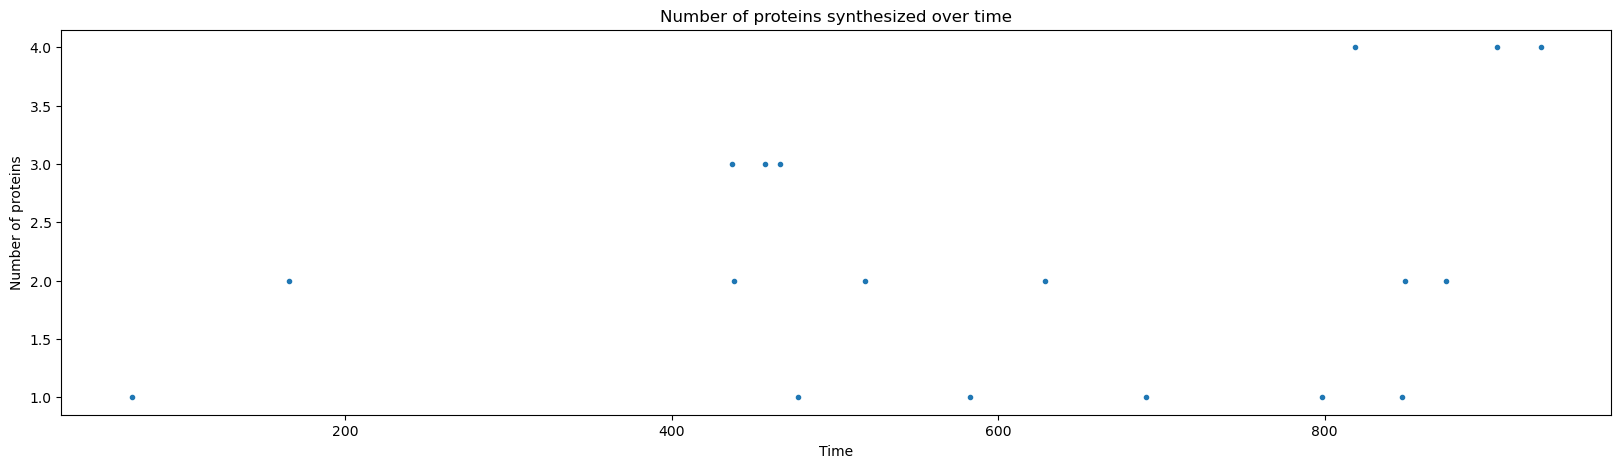

In [15]:
plot_proteins_number_over_time(results_df)

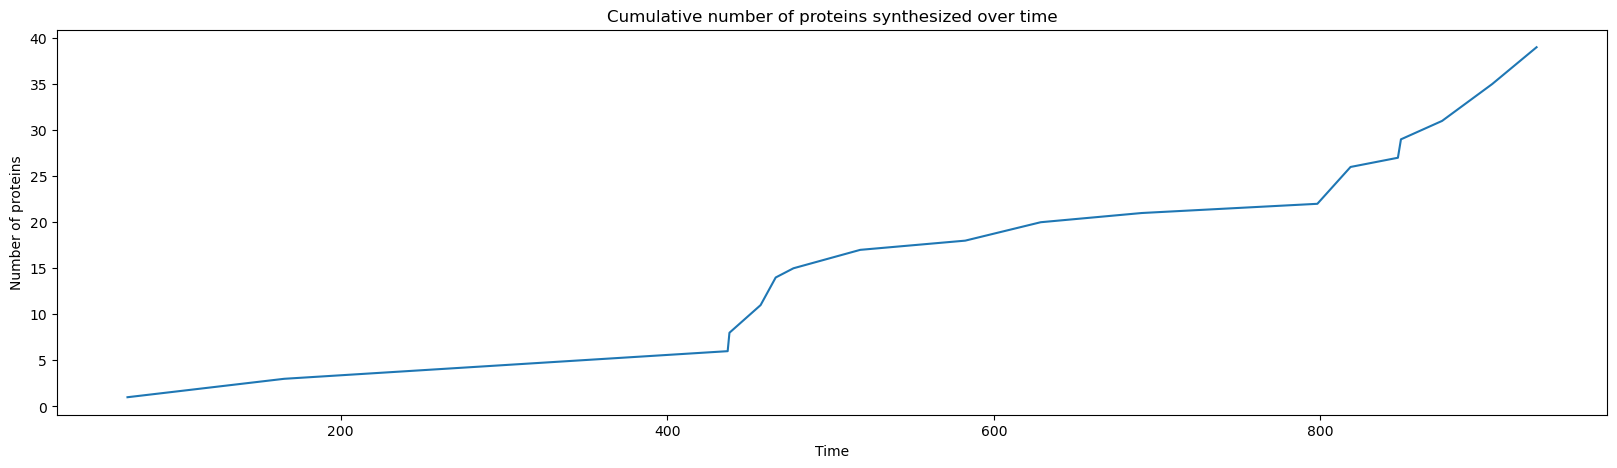

In [16]:
plot_cumulative_proteins_number_over_time(results_df)

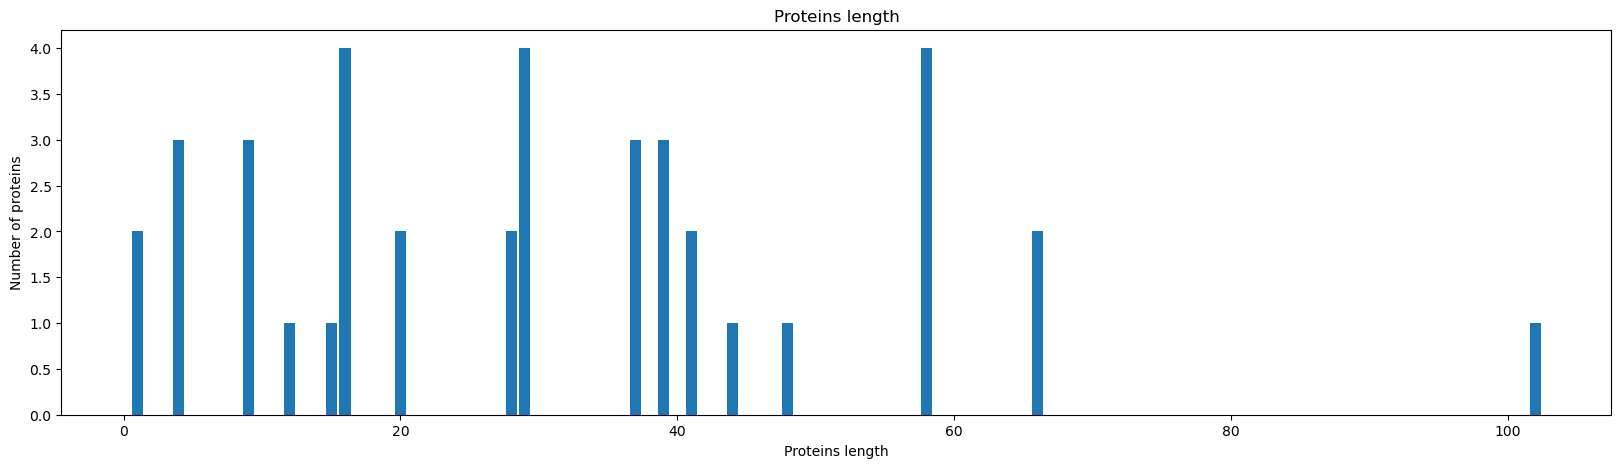

In [17]:
barplot_proteins_length(results_df)

### Nucleotides Level

In [18]:
import json

with open('results/nucleotides_history_uracil.json') as f:
    uracil_dict = json.load(f)

with open('results/nucleotides_history_adenine.json') as f:
    adenine_dict = json.load(f)

with open('results/nucleotides_history_guanine.json') as f:
    guanine_dict = json.load(f)

with open('results/nucleotides_history_cytosine.json') as f:
    cytosine_dict = json.load(f)

In [19]:
"""
plot_nucleotide_level_over_time(
    uracil_dict, adenine_dict, guanine_dict, cytosine_dict)
"""

'\nplot_nucleotide_level_over_time(\n    uracil_dict, adenine_dict, guanine_dict, cytosine_dict)\n'

In [20]:
"""
barplot_nucleotide_level_over_time(
    uracil_dict, adenine_dict, guanine_dict, cytosine_dict, time_unit=1)
"""

'\nbarplot_nucleotide_level_over_time(\n    uracil_dict, adenine_dict, guanine_dict, cytosine_dict, time_unit=1)\n'

### RNA Polymerase

In [21]:
with open('results/rna_polymerase_history.json') as f:
    rna_polymerase_dict = json.load(f)

In [22]:
rna_polymerase_df = dict_to_dataframe(rna_polymerase_dict)

In [23]:
rna_polymerase_df.describe() # values in seconds

,queue,request_time,available_time,wait_time,end_time,usage_time
count,47.0,47.000000,47.000000,47.0,47.000000,47.000000
mean,0.0,475.146228,475.146228,0.0,581.950353,15.875804
std,0.0,226.793990,226.793990,0.0,229.160965,13.591274
min,0.0,0.000000,0.000000,0.0,66.953100,1.410000
25%,0.0,318.533850,318.533850,0.0,409.819300,4.126450
50%,0.0,432.082300,432.082300,0.0,580.267500,10.157100
75%,0.0,679.813300,679.813300,0.0,787.529950,25.406000
max,0.0,820.621800,820.621800,0.0,930.963300,55.820000


### Ribosome

In [24]:
with open('results/ribosome_history.json') as f:
    ribosome_dict = json.load(f)

In [25]:
ribosome_df = dict_to_dataframe(ribosome_dict)

In [26]:
ribosome_df.describe()

,queue,request_time,available_time,wait_time,end_time,usage_time
count,47.0,47.000000,47.000000,47.0,47.000000,47.000000
mean,0.0,581.950353,581.950353,0.0,583.325885,1.312621
std,0.0,229.160965,229.160965,0.0,228.893273,1.109284
min,0.0,66.953100,66.953100,0.0,69.353100,0.050000
25%,0.0,409.819300,409.819300,0.0,410.969300,0.380100
50%,0.0,580.267500,580.267500,0.0,582.467500,1.146700
75%,0.0,787.529950,787.529950,0.0,788.954950,1.900000
max,0.0,930.963300,930.963300,0.0,932.413300,5.100000
